In [347]:
import numpy as np
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [348]:
#  生成一个随机半正定对称矩阵 A
n = 5
B = np.random.randint(0,1000,(n,1))
A = B @ B.T
x0 = np.random.randint(0,100, (n,1))
print(x0)
print(A)

[[12]
 [57]
 [40]
 [ 8]
 [ 8]]
[[801025 112770 168260  65335 793865]
 [112770  15876  23688   9198 111762]
 [168260  23688  35344  13724 166756]
 [ 65335   9198  13724   5329  64751]
 [793865 111762 166756  64751 786769]]


In [349]:
# 求解特征值和特征向量
A_lambda = np.linalg.eig(A)

#求解特征值即特征向量
A_lambda = np.linalg.eig(A)


index = np.argmax(A_lambda[0])
A_lambda_max = np.real(A_lambda[0][index])
u1 = np.transpose([A_lambda[1][:,index]])


print('A 最大特征值为：{0}\n对应的特征向量：\n{1}'.format(A_lambda_max, u1))

A 最大特征值为：1644343.0
对应的特征向量：
[[-0.69795404+0.j]
 [-0.09825945+0.j]
 [-0.14660934+0.j]
 [-0.0569281 +0.j]
 [-0.69171535+0.j]]


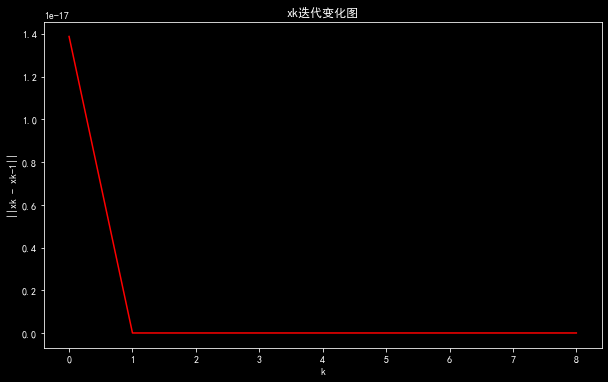

In [350]:
k = int(input('请输入迭代次数:'))

xk = x0

x_list = []
xu_list = []


flag = 0
if u1[0][0] > 0:
    u11 = 0 - u1
    flag = 1
else:
    u11 = u1

for i in range(k):
    y = A @ xk
    xm = xk
    xk = (1/np.linalg.norm(y)) * y
    if i > 0:
        x_list.append(np.linalg.norm(xk - xm))
        xu_list.append(np.linalg.norm(xk + u11))


# 显示xk变化范数的图像来验证xk的收敛性
plt.figure(figsize=(10,6))
plt.plot(range(len(x_list)),x_list,'r')
plt.title('xk迭代变化图')
plt.xlabel('k')
plt.ylabel('||xk - xk-1||')
plt.show()

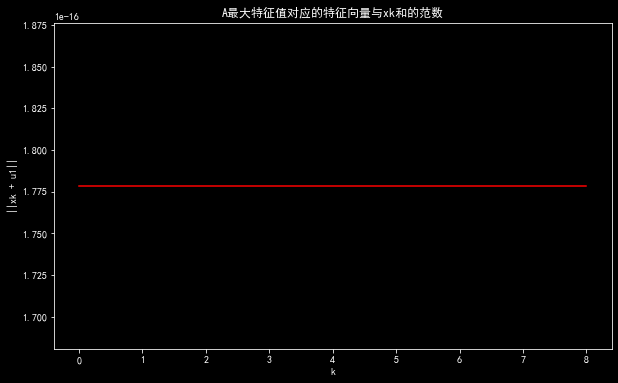

xk与u1互为相反数!


In [351]:
# 可以大致看出xk与u1要么是相同要么是相反数,下面作出图像分析
# 即 xk = u1 && xk = -u1
plt.figure(figsize=(10,6))
plt.plot(range(len(xu_list)),xu_list,'r')
plt.title('A最大特征值对应的特征向量与xk和的范数')
plt.xlabel('k')
plt.ylabel('||xk + u1||')
plt.show()

if flag == 0:
    print('xk与u1互为相反数!')
else:
    print('xk与u1相同!')